## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
import math
# import os
from pylab import *
import numpy as np
import random
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier



## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

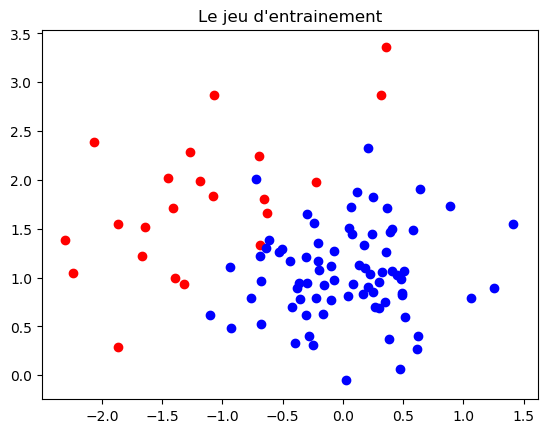

In [3]:
plt.title("Le jeu d'entrainement")
X1 = train[np.where(train[:,0]==1.)][:,1:3]
X2 = train[np.where(train[:,0]==2.)][:,1:3]
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')
plt.show()

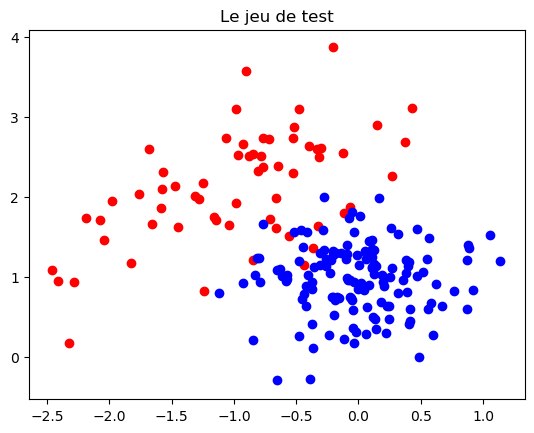

In [4]:
plt.title("Le jeu de test")
X1_test = test[np.where(test[:,0]==1.)][:,1:3]
X2_test = test[np.where(test[:,0]==2.)][:,1:3]
plt.scatter(X1_test[:,0],X1_test[:,1], color = 'red')
plt.scatter(X2_test[:,0],X2_test[:,1], color = 'b')
plt.show()

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


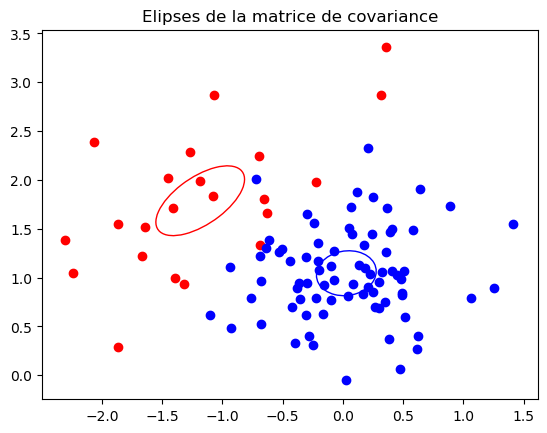

In [5]:
pi_1 = len(X1)/len(train)
pi_2 = len(X2)/len(train)

mu_1 = np.array([np.mean(X1[:,0]),np.mean(X1[:,1])])
mu_2 = np.array([np.mean(X2[:,0]),np.mean(X2[:,1])])

sigma_1 = np.cov(X1.T)
sigma_2 = np.cov(X2.T)

sigma = (sigma_1 + sigma_2)/2

logpi_1 = np.log(pi_1)
logpi_2 = np.log(pi_2)


ax = plt.gca()

#Elipse pour les X1
eigenvalues1, eigenvectors1 = np.linalg.eig(sigma_1)
angle_1 = arctan(-eigenvectors1[0][1]/eigenvectors1[0][0]) *180/math.pi
elipse_1 = Ellipse(mu_1,np.sqrt(eigenvalues1[0]),np.sqrt(eigenvalues1[1]),angle = angle_1, edgecolor='r', fc='None')

#Elipse pour les X2
eigenvalues2, eigenvectors2 = np.linalg.eig(sigma_2)
angle_2 = arctan(-eigenvectors2[0][1]/eigenvectors2[0][0])*180/math.pi
elipse_2 = Ellipse(mu_2,np.sqrt(eigenvalues2[0]),np.sqrt(eigenvalues2[1]),angle = angle_2, edgecolor='b', fc='None')

plt.title("Elipses de la matrice de covariance")
plt.scatter(X1[:,0],X1[:,1], color = 'r')
plt.scatter(X2[:,0],X2[:,1], color = 'b')
ax.add_patch(elipse_1)
ax.add_patch(elipse_2)



### Remarques sur les données :<br><br>

Il y a plusieurs points à remarquer sur ces données :<br>
* Dans un premier temps, on voit que les 2 classses sont bien séparées mise à part quelques points isolés. On peut donc penser que les méthodes de LDA et QDA vont donner des résultats satisfaisants. <br>
* On peut cependant noter que sur le jeu de test la frontière est moins claire, il y aura don certainement des erreurs. <br>
* Enfin, on a l'impression que les données sont linéairement séparées. La LDA devrait donc fonctionner aussi bien que la QDA, tout en consommant beaucoup moins de temps de calcul (inversion des matrices de covariance). Dans notre cas le problème est simple mais si on avait eu une grande quantité de données et de classes, cette remarque aurait eu toute son importance. 




## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [6]:
#LDA
sigma_inv = np.linalg.inv(sigma)
def y1_LDA(x):
    return(logpi_1 + x@sigma_inv@mu_1 - 1/2 * mu_1.T@sigma_inv@mu_1)
def y2_LDA(x):
    return(logpi_2 + x@sigma_inv@mu_2 - 1/2 * mu_2.T@sigma_inv@mu_2)
def LDA(x):
    return(argmax([y1_LDA(x),y2_LDA(x)]) + 1 )



In [7]:
#QDA
sigma_1_inv = np.linalg.inv(sigma_1)
sigma_2_inv = np.linalg.inv(sigma_2)
def y1_QDA(x):
    return(logpi_1 - np.log(np.linalg.det(sigma_1))/2 - (x-mu_1).T@sigma_1_inv@(x-mu_1)/2)
def y2_QDA(x):
    return(logpi_2 - np.log(np.linalg.det(sigma_2))/2 - (x-mu_2).T@sigma_2_inv@(x-mu_2)/2)
def QDA(x):
    return(argmax([y1_QDA(x),y2_QDA(x)]) + 1 )

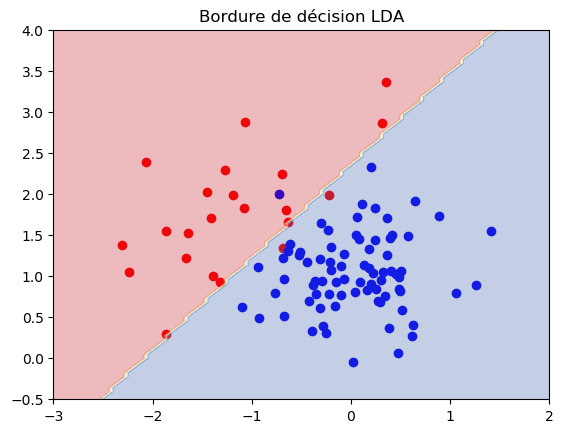

In [8]:
# frontières de décision LDA :
xx, yy = np.meshgrid(np.linspace(-3,2,100),np.linspace(-0.5,4,100))
pts = np.c_[xx.ravel(), yy.ravel()]

Y_LDA = np.array([LDA(pt) for pt in pts])
Y_LDA = np.round(Y_LDA).reshape(xx.shape)

plt.title("Bordure de décision LDA")
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')

plt.contourf(xx, yy, Y_LDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()



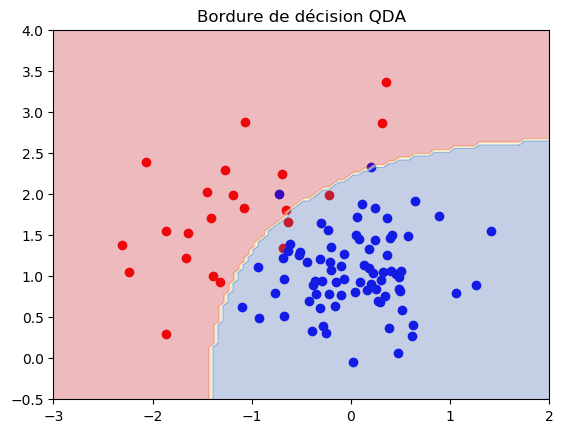

In [9]:
# frontières de décision QDA :
Y_QDA = np.array([QDA(pt) for pt in pts])
Y_QDA = np.round(Y_QDA).reshape(xx.shape)

plt.title("Bordure de décision QDA")
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')

plt.contourf(xx, yy, Y_QDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

In [11]:
#Erreurs sur le jeu de test et de train
err_LDA_train = 0
err_QDA_train = 0
for pt in train:
    y = pt[0]
    x= pt[1:3]
    predict_LDA = LDA(x)
    predict_QDA = QDA(x)
    err_LDA_train += abs(predict_LDA-y)
    err_QDA_train += abs(predict_QDA-y)

err_LDA_test = 0
err_QDA_test = 0
for pt in test:
    y = pt[0]
    x= pt[1:3]
    predict_LDA = LDA(x)
    predict_QDA = QDA(x)
    err_LDA_test += abs(predict_LDA-y)
    err_QDA_test += abs(predict_QDA-y)
    
print("En utilisant la méthode LDA, on obtient une erreur de " + str(err_LDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_LDA_test/len(test)*100) + " % sur le jeu de test.")
print("En utilisant la méthode QDA, on obtient une erreur de " + str(err_QDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_QDA_test/len(test)*100) + " % sur le jeu de test.")

En utilisant la méthode LDA, on obtient une erreur de 3.0 % sur le jeu de train et 5.5 % sur le jeu de test.
En utilisant la méthode QDA, on obtient une erreur de 5.0 % sur le jeu de train et 5.0 % sur le jeu de test.


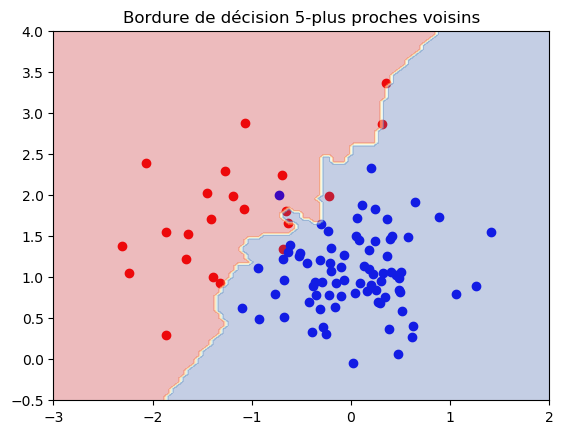

En utilisant la méthode des k plus proches voisins, on obtient une erreur de 5.0 % sur le jeu de train et 6.0 % sur le jeu de test.


In [10]:
kneigh = KNeighborsClassifier(n_neighbors=5)
kneigh.fit(train[:,1:],train[:,0])
err_Kneigh_train = 0

Y_kneigh = np.array([kneigh.predict([pt]) for pt in pts])
Y_kneigh = np.round(Y_kneigh).reshape(xx.shape)

plt.title("Bordure de décision 5-plus proches voisins")
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')

plt.contourf(xx, yy, Y_kneigh, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

for pt in train:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_Kneigh = kneigh.predict(x)
    err_Kneigh_train += abs(predict_Kneigh-y)

err_Kneigh_test = 0
for pt in test:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_Kneigh = kneigh.predict(x)
    err_Kneigh_test += abs(predict_Kneigh-y)

print("En utilisant la méthode des k plus proches voisins, on obtient une erreur de " + str(err_Kneigh_train[0]/len(train)*100) + " % sur le jeu de train et " + str(err_Kneigh_test[0]/len(test)*100) + " % sur le jeu de test.")

### Analyse des résultats

Les résultats obtenus pour chaques méthodes sont assez proches... On avait anticipé ce phénomène grâce à un rapide coup d'oeil sur les données. Dans le cas présent, on préfèrera utiliser la LDA, puis la QDA et enfin les K-plus proches voisins ( temps de calcul ).<br><br>
Pour voir l'intéret de la QDA  on va créer un autre dataset et l'utiliser pour la suite.


# Deuxième dataset 

In [12]:
quad = lambda x: x**2

X_train = 5*np.random.rand(500,2) - 2.5
Y_train = []
for x in X_train :
    bruit = random.random()
    if (quad(x[0]) + bruit>x[1]):
        Y_train.append([1])
    else:
        Y_train.append([2])
Y_train = np.array(Y_train)
X_train = np.concatenate((Y_train,X_train),axis = 1)

X_test = 5*np.random.rand(500,2) - 2.5
Y_test = []
for x in X_test :
    bruit = random.random()
    if (quad(x[0]) + bruit>x[1]):
        Y_test.append([1])
    else:
        Y_test.append([2])
Y_test = np.array(Y_test)   
X_test = np.concatenate((Y_test,X_test),axis = 1)


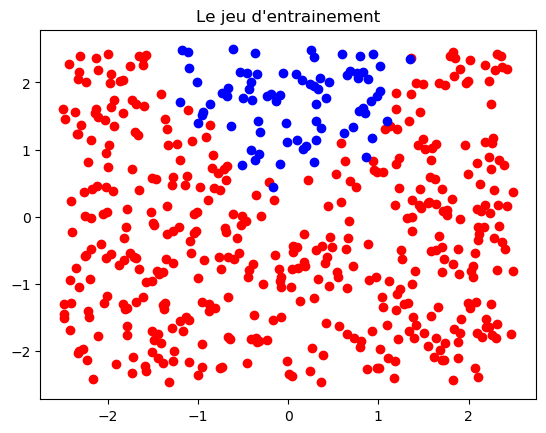

In [13]:
plt.title("Le jeu d'entrainement")
X1_dataset2 = X_train[np.where(X_train[:,0]==1.)][:,1:3]
X2_dataset2 = X_train[np.where(X_train[:,0]==2.)][:,1:3]
plt.scatter(X1_dataset2[:,0],X1_dataset2[:,1], color = 'red')
plt.scatter(X2_dataset2[:,0],X2_dataset2[:,1], color = 'b')
plt.show()

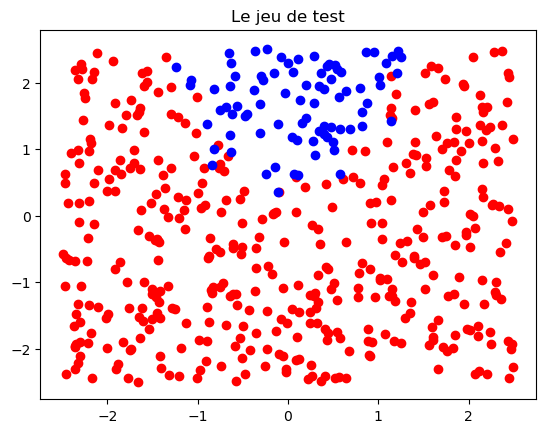

In [14]:
plt.title("Le jeu de test")
X1_dataset2 = X_test[np.where(X_test[:,0]==1.)][:,1:3]
X2_dataset2 = X_test[np.where(X_test[:,0]==2.)][:,1:3]
plt.scatter(X1_dataset2[:,0],X1_dataset2[:,1], color = 'red')
plt.scatter(X2_dataset2[:,0],X2_dataset2[:,1], color = 'b')
plt.show()

La construction est très simpliste mais on veut seulement montrer l'intérêt de la QDA.

## TO DO : LDA & QDA using scikit-learn module (1er dataset)

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [469]:
#sklearn LDA
LDA_sklearn = LinearDiscriminantAnalysis()
LDA_sklearn.fit(train[:,1:3],train[:,0])
#sklearn QDA
QDA_sklearn = QuadraticDiscriminantAnalysis()
QDA_sklearn.fit(train[:,1:3],train[:,0])

#Erreurs sur le jeude test et de train
err_LDA_train = 0
err_QDA_train = 0
for pt in train:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_LDA = LDA_sklearn.predict(x)
    predict_QDA = QDA_sklearn.predict(x)
    err_LDA_train += abs(predict_LDA-y)
    err_QDA_train += abs(predict_QDA-y)

err_LDA_test = 0
err_QDA_test = 0
for pt in test:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_LDA = LDA_sklearn.predict(x)
    predict_QDA = QDA_sklearn.predict(x)
    err_LDA_test += abs(predict_LDA-y)
    err_QDA_test += abs(predict_QDA-y)
    
print("en utilisant la méthode LDA, on obtient une erreur de " + str(err_LDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_LDA_test/len(test)*100) + " % sur le jeu de test.")
print("en utilisant la méthode QDA, on obtient une erreur de " + str(err_QDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_QDA_test/len(test)*100) + " % sur le jeu de test.")

en utilisant la méthode LDA, on obtient une erreur de [3.] % sur le jeu de train et [5.5] % sur le jeu de test.
en utilisant la méthode QDA, on obtient une erreur de [5.] % sur le jeu de train et [5.] % sur le jeu de test.


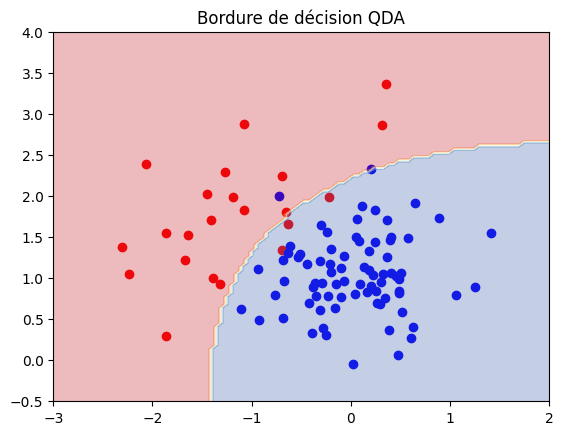

In [470]:
# frontières de décision QDA :
xx, yy = np.meshgrid(np.linspace(-3,2,100),np.linspace(-0.5,4,100))
pts = np.c_[xx.ravel(), yy.ravel()]

Y_QDA = np.array([QDA_sklearn.predict(np.array([pt])) for pt in pts])
Y_QDA = np.round(Y_QDA).reshape(xx.shape)

plt.title("Bordure de décision QDA")
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')

plt.contourf(xx, yy, Y_QDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

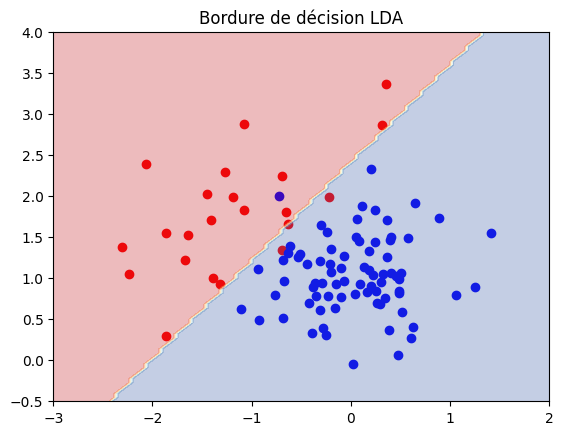

In [471]:
Y_LDA = np.array([LDA_sklearn.predict(np.array([pt])) for pt in pts])
Y_LDA = np.round(Y_LDA).reshape(xx.shape)

plt.title("Bordure de décision LDA")
plt.scatter(X1[:,0],X1[:,1], color = 'red')
plt.scatter(X2[:,0],X2[:,1], color = 'b')

plt.contourf(xx, yy, Y_LDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

Avec les méthodes de scikit-learn, on obtient exactement les mêmes résultats.

## scikit-learn avec le second dataset

In [472]:
#sklearn LDA
LDA_sklearn = LinearDiscriminantAnalysis()
LDA_sklearn.fit(X_train[:,1:3],X_train[:,0])
#sklearn QDA
QDA_sklearn = QuadraticDiscriminantAnalysis()
QDA_sklearn.fit(X_train[:,1:3],X_train[:,0])

#Erreurs sur le jeude test et de train
err_LDA_train = 0
err_QDA_train = 0
for pt in X_test:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_LDA = LDA_sklearn.predict(x)
    predict_QDA = QDA_sklearn.predict(x)
    err_LDA_train += abs(predict_LDA-y)
    err_QDA_train += abs(predict_QDA-y)

err_LDA_test = 0
err_QDA_test = 0
for pt in X_train:
    y = pt[0]
    x= np.array([pt[1:3]])
    predict_LDA = LDA_sklearn.predict(x)
    predict_QDA = QDA_sklearn.predict(x)
    err_LDA_test += abs(predict_LDA-y)
    err_QDA_test += abs(predict_QDA-y)
    
print("en utilisant la méthode LDA, on obtient une erreur de " + str(err_LDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_LDA_test/len(test)*100) + " % sur le jeu de test.")
print("en utilisant la méthode QDA, on obtient une erreur de " + str(err_QDA_train/len(train)*100) + " % sur le jeu de train et " + str(err_QDA_test/len(test)*100) + " % sur le jeu de test.")

en utilisant la méthode LDA, on obtient une erreur de [73.] % sur le jeu de train et [39.5] % sur le jeu de test.
en utilisant la méthode QDA, on obtient une erreur de [34.] % sur le jeu de train et [9.] % sur le jeu de test.


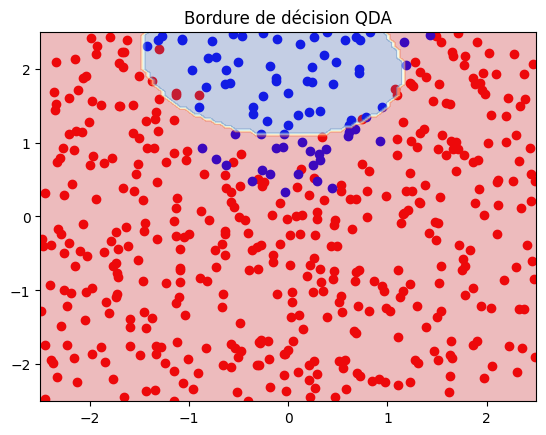

In [473]:
# frontières de décision QDA :
xx, yy = np.meshgrid(np.linspace(-2.5,2.5,100),np.linspace(-2.5,2.5,100))
pts = np.c_[xx.ravel(), yy.ravel()]

Y_QDA = np.array([QDA_sklearn.predict(np.array([pt])) for pt in pts])
Y_QDA = np.round(Y_QDA).reshape(xx.shape)

plt.title("Bordure de décision QDA")
plt.scatter(X1_dataset2[:,0],X1_dataset2[:,1], color = 'red')
plt.scatter(X2_dataset2[:,0],X2_dataset2[:,1], color = 'b')

plt.contourf(xx, yy, Y_QDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

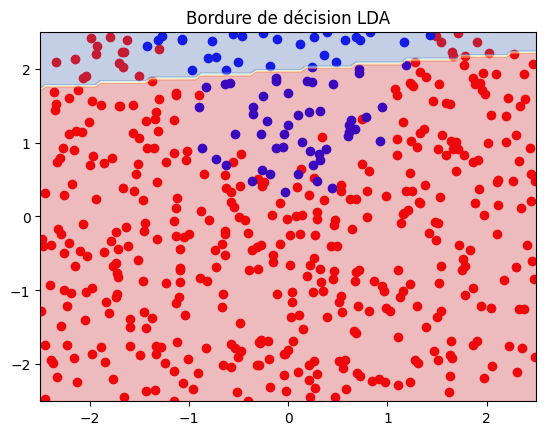

In [474]:
Y_LDA = np.array([LDA_sklearn.predict(np.array([pt])) for pt in pts])
Y_LDA = np.round(Y_LDA).reshape(xx.shape)

plt.title("Bordure de décision LDA")
plt.scatter(X1_dataset2[:,0],X1_dataset2[:,1], color = 'red')
plt.scatter(X2_dataset2[:,0],X2_dataset2[:,1], color = 'b')

plt.contourf(xx, yy, Y_LDA, cmap=plt.cm.RdYlBu, alpha=0.3 )
plt.show()

On voit ici l'intéret de la QDA quand les données ne sont pas linéairement séparées mais bien quadratiquement (pas sûr que ce soit bien français...) séparées 